# ANLY 590 Assignment 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
from IPython.display import Image

## 1. Feedforward: Building a ReLu 2 Layer neural network

Previously we built a network where the hidden layer included a logistic transform. Recall that logistic units have fallen from favor in deep networks because they saturate easily and are not zero-centered. Rather consider the rectified linear activation function: $h_j = max(0; a_j )$.

1. Plot (draw) a network with:

$\qquad$ 2 inputs,

$\qquad$2 hidden layers (where the first layer contains 3 hidden units and the second contains 2 hidden units) and a

$\qquad$3-class output (use a softmax function)

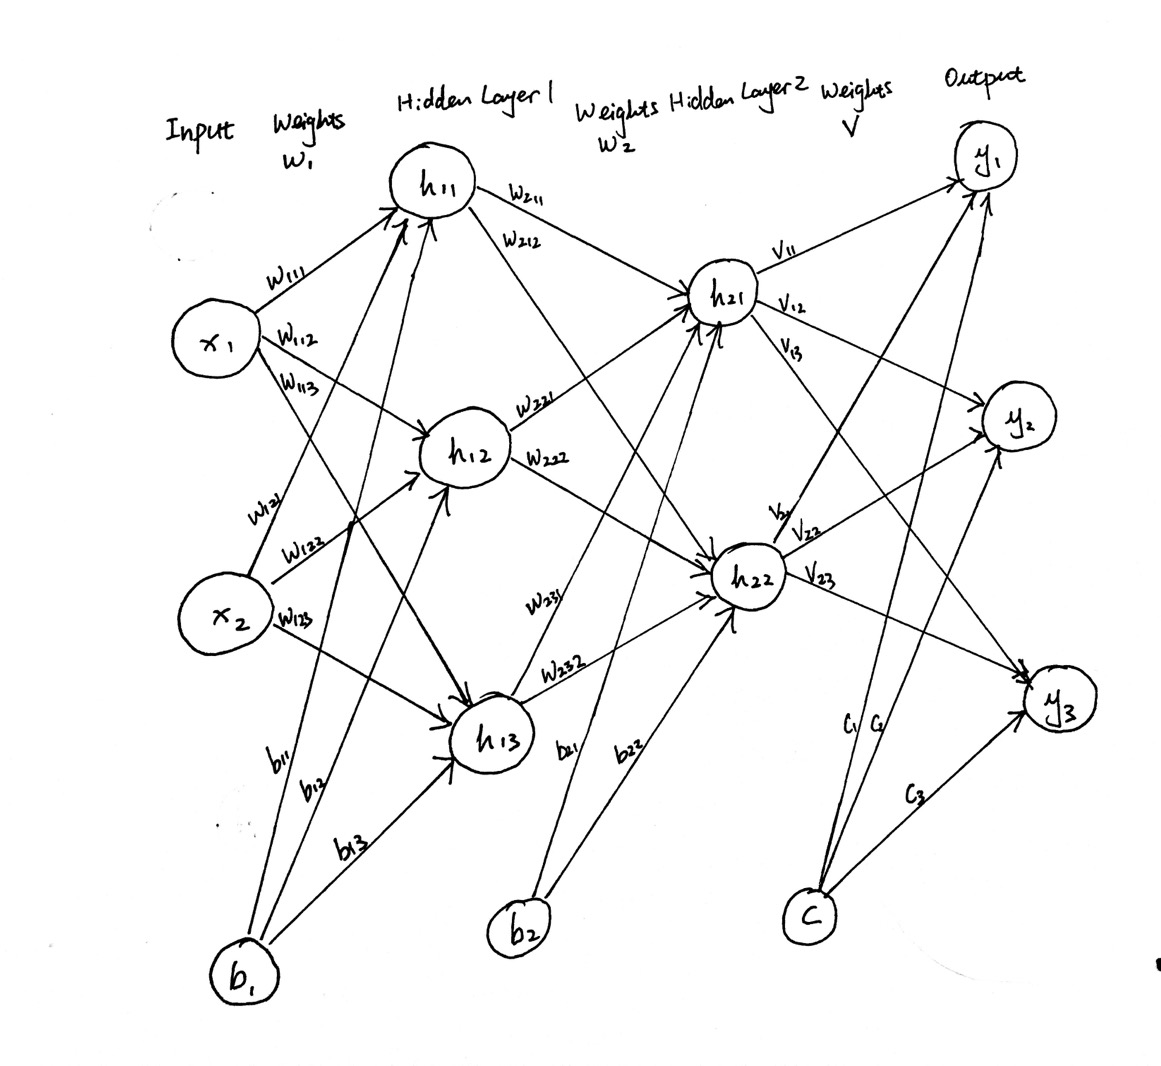

In [2]:
Image(filename="ANN.jpeg")

$\quad$2. Write out the mathematical equation for this network

$$a^{(1)} = W^{(1)}X + b^{(1)}$$
$$h^{(1)}_{i,j} = max(0, a^{(1)}_{i,j})$$
$$a^{(2)} = W^{(2)}h^{(1)} + b^{(2)}$$
$$h^{(2)}_{i,j} = max(0, a^{(2)}_{i,j})$$
$$z = Vh^{(2)} + c$$
$$\hat{Y_j} = \frac{e^{z_j}}{\sum^{k=1}_j e^{z_k}}$$

$\quad$3. Write out the function in python, call it ff_nn_2_ReLu(...)

In [3]:
def relu(x):
    return np.maximum(x,0)
def relu_derivative(x):
    return np.where(x>0, 1, 0)
def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=0))[np.newaxis,:]
def ff_nn_2_ReLu(X,parameters):
    # Unpacking parameters    
    W1,W2,V,b1,b2,c = parameters
    
    # Forward pass
    a1 = np.dot(W1,X) + b1
    H1 = relu(a1)
    a2 = np.dot(W2,H1) + b2
    H2 = relu(a2)
    z = np.dot(V,H2) + c
    Y_hat = softmax(z)
    return Y_hat

$\quad$4. what are the class probabilities associated with the forward pass of each sample?

In [4]:
X = np.array([[1,0,0],[-1,-1,1]])
W1 = np.array([[1,0],[-1,0],[0,0.5]])
b1 = np.array([[0],[0],[1]])
W2 = np.array([[1,0,0],[-1,-1,0]])
V = np.array([[1,1],[0,0],[-1,-1]])
b2 = np.array([[1],[-1]])
c = np.array([[1],[0],[0]])
parameters = (W1,W2,V, b1,b2,c)
print(parameters)

(array([[ 1. ,  0. ],
       [-1. ,  0. ],
       [ 0. ,  0.5]]), array([[ 1,  0,  0],
       [-1, -1,  0]]), array([[ 1,  1],
       [ 0,  0],
       [-1, -1]]), array([[0],
       [0],
       [1]]), array([[ 1],
       [-1]]), array([[1],
       [0],
       [0]]))


In [5]:
ff_nn_2_ReLu(X,parameters)

array([[ 0.94649912,  0.84379473,  0.84379473],
       [ 0.04712342,  0.1141952 ,  0.1141952 ],
       [ 0.00637746,  0.04201007,  0.04201007]])

The matrix of class probabilities is shown above. 

# 2. Gradient Descent

The Rosenbrock function is a famous non-convex function that is used to explore optimization algorithms. This simple 2-D function has some very tricky structure.
$$f(x,y)=(1-x)^2+100*(y-x^2)^2$$
1. What are the partial derivatives of f with respect to x and to y?
$$\partial_x f=2x-2-400x(y-x^2)$$
$$\partial_y f=200(y-x^2)$$
2. Create a visualization of the contours of the Rosenbrock function.

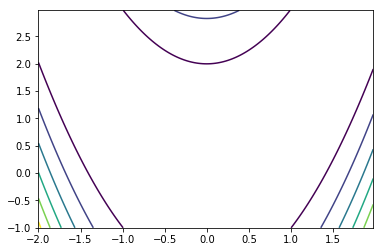

In [6]:
delta = 0.025
x_axis = np.arange(-2, 2, delta)
y_axis = np.arange(-1, 3, delta)
X2, Y2 = np.meshgrid(x_axis, y_axis)
f = (1-X2)**2 + 100*(Y2-X2**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X2, Y2, f)

$\quad$3. Write a Gradient Descent algorithm for finding the minimum of the function. Visualize your results with a few different learning rates.

In [7]:
def grad_f(vector):
    x, y = vector
    df_dx = 2*x-2-400*x*(y-x**2)
    df_dy = 200*(y-x**2)
    return np.array([df_dx, df_dy])
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

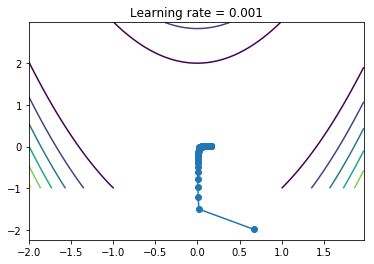

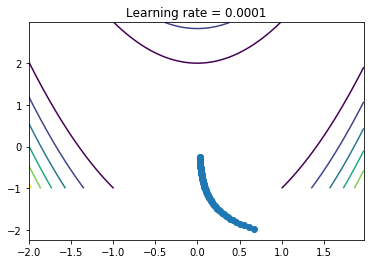

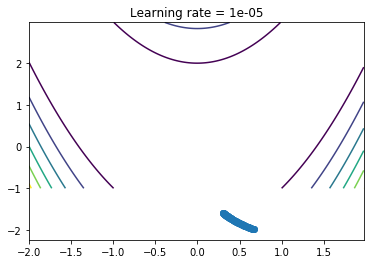

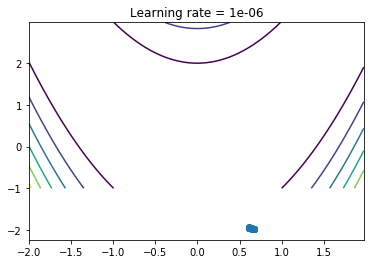

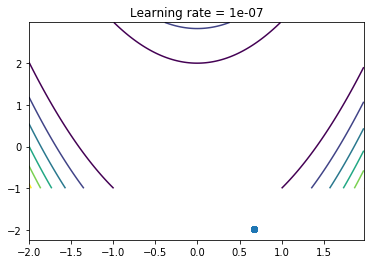

In [8]:
def vis_2_3(learning_rate): 
    np.random.seed(111)
    traj = grad_descent(iterations=100, learning_rate=learning_rate)
    fig, ax = plt.subplots()
    CS = ax.contour(X2, Y2, f)
    x= traj[:,0]
    y= traj[:,1]
    plt.title('Learning rate = '+ str(learning_rate))
    plt.plot(x,y,'-o')

for i in range(3,8):
    vis_2_3(10**-i)

The graphs above are visualizations with different learning rates. 

$\quad$4. Write a Gradient Descent With Momentum algorithm for finding the minimum. Visualize your results with a few different settings of the algorithm's hyperparameters.

In [9]:
def grad_descent_with_momentum(starting_point=None, iterations=10, alpha=.9, epsilon=10):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
    return np.array(trajectory)

In [10]:
def vis_2_4(epsilon, alpha):
    np.random.seed(112)
    traj = grad_descent_with_momentum(iterations=100, epsilon=epsilon, alpha=alpha)
    fig, ax = plt.subplots()
    CS = ax.contour(X2, Y2, f)
    x= traj[:,0]
    y= traj[:,1]
    plt.title('epsilon = '+ str(epsilon) + ', alpha = ' + str(alpha))
    plt.plot(x,y,'-o')

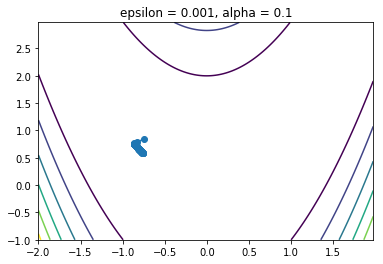

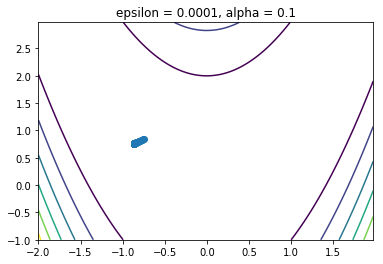

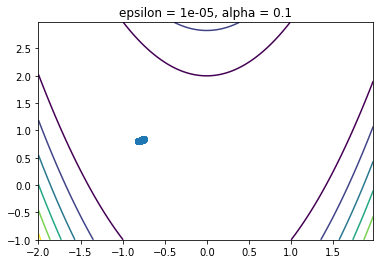

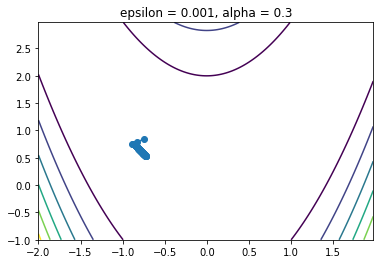

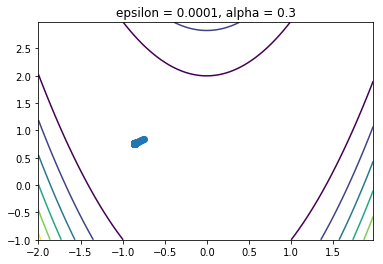

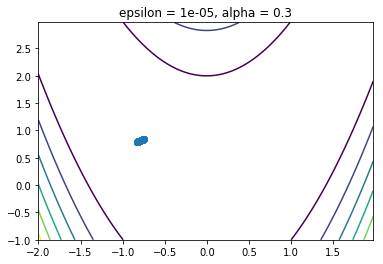

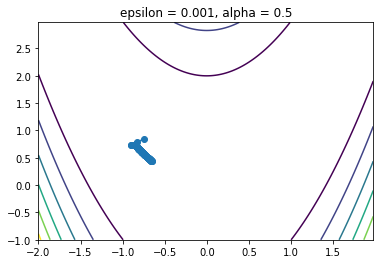

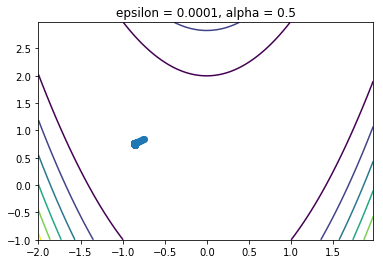

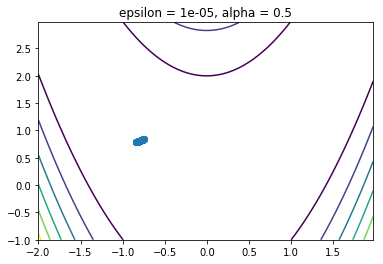

In [11]:
alphas = [0.1, 0.3, 0.5]
epsilons = [0.001, 0.0001, 0.00001]
for alpha in alphas: 
    for epsilon in epsilons: 
        vis_2_4(epsilon, alpha)

The graphs above are visualizations for different hyperparameters.

# 3. Backprop

1. For the same network as in Number 1, derive expressions of the gradient of the Loss function with respect to each of the model parameters.

Softmax Loss Function: 
$$L = -\sum_jy_jlog(\hat{y-j})$$
Gradient of Loss Function: 

$\frac{\partial L}{\partial W^{(1)}} = \frac{\partial L}{\partial z} \bullet \frac{\partial z}{\partial h^{(2)}} \bullet \frac{\partial h^{(2)}}{\partial a^{(2)}} \bullet \frac{\partial a^{(2)}}{\partial h^{(1)}} \bullet \frac{\partial h^{(1)}}{\partial a^{(1)}} \bullet \frac{\partial a^{(1)}}{\partial W^{(1)}} = (\hat Y -Y)\bullet V \bullet t(h^{(2)}) \bullet W^{(2)} \bullet t(h^{(1)}) \bullet X$

$\frac{\partial L}{\partial b^{(1)}} = \frac{\partial L}{\partial z} \bullet \frac{\partial z}{\partial h^{(2)}} \bullet \frac{\partial h^{(2)}}{\partial a^{(2)}} \bullet \frac{\partial a^{(2)}}{\partial h^{(1)}} \bullet \frac{\partial h^{(1)}}{\partial a^{(1)}} \bullet \frac{\partial a^{(1)}}{\partial b^{(1)}} = (\hat Y -Y)\bullet V \bullet t(h^{(2)}) \bullet W^{(2)} \bullet t(h^{(1)})$


$\frac{\partial L}{\partial W^{(2)}} = \frac{\partial L}{\partial z} \bullet \frac{\partial z}{\partial h^{(2)}} \bullet \frac{\partial h^{(2)}}{\partial a^{(2)}} \bullet \frac{\partial a^{(2)}}{\partial W^{(2)}} = (\hat Y -Y)\bullet V \bullet t(h^{(2)}) \bullet h^{(1)}$

$\frac{\partial L}{\partial b^{(2)}} = \frac{\partial L}{\partial z} \bullet \frac{\partial z}{\partial h^{(2)}} \bullet \frac{\partial h^{(2)}}{\partial a^{(2)}} \bullet \frac{\partial a^{(2)}}{\partial b^{(2)}} = (\hat Y -Y)\bullet V \bullet t(h^{(2)})$

$\frac{\partial L}{\partial V} = \frac{\partial L}{\partial z} \bullet \frac{\partial z}{\partial V} = (\hat Y -Y)\bullet h^{(2)}$

$\frac{\partial L}{\partial c} = \frac{\partial L}{\partial z} \bullet \frac{\partial z}{\partial c} = (\hat Y -Y)$

where $t(x)=1$ when $x >0$; 0 otherwise. 

$\quad$2. Write a function grad_f(...) that takes in a weights vector and returns the gradient of the Loss at that location.

In [12]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()
def pack_params(param_vec):
    w_11, w_12, w_13,w_21, w_22,w_23, w_14, w_15, w_24, w_25, w_34,w_35,b_11, b_12,b_13,b_21,b_22,v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3 = param_vec
    W1 = np.array([[w_11,w_21],[w_12,w_22],[w_13,w_23]])
    W2 = np.array([[w_14,w_24,w_34],[w_15,w_25,w_35]])
    b1 = np.array([[b_11], [b_12],[b_13]])
    b2 = np.array([[b_21],[b_22]])
    V = np.array([[v_11, v_21],[v_12, v_22],[v_13, v_23]])
    c = np.array([[c_1], [c_2], [c_3]])
    return (W1,W2,V,b1,b2,c)
def unpack_params(w1,w2,v,b1,b2,c):
    w_11, w_21, w_12,w_22, w_13, w_23= w1[0,0], w1[0,1],w1[1,0], w1[1,1], w1[2,0],w1[2,1]
    w_14,w_24,w_34,w_15,w_25,w_35 = w2[0,0],w2[0,1],w2[0,2],w2[1,0],w2[1,1],w2[1,2]
    b_11, b_12, b_13 = np.squeeze(b1[0]), np.squeeze(b1[1]), np.squeeze(b1[2]) 
    b_21,b_22 = np.squeeze(b2[0]), np.squeeze(b2[1])
    v_11, v_21, v_12, v_22, v_13, v_23 = v[0,0], v[0,1], v[1,0], v[1,1], v[2,0], v[2,1]
    c_1, c_2, c_3 = np.squeeze(c[0]), np.squeeze(c[1]), np.squeeze(c[2])
    return np.array([w_11, w_12, w_13,w_21, w_22,w_23, w_14, w_15, w_24, w_25, w_34,w_35,b_11, b_12,b_13,b_21,b_22,v_11, v_12, v_13, v_21, v_22, v_23, c_1, c_2, c_3])


def grad_f(param_vec,x,Y):
    x = x.T
    w1,w2,v,b1,b2,c =pack_params(param_vec)
    
    a1 = w1.dot(x) + b1
    H1 = relu(a1)
    a2 = w2.dot(H1) + b2
    H2 = relu(a2)
    a3 = v.dot(H2) + c
    Y_hat = softmax(a3).T
    
    d_v = H2.dot((Y_hat-Y)).T
    d_c = (Y_hat-Y).sum(axis = 0).reshape(3,1)
    d_w2 = (((Y_hat-Y).dot(v)).T * (H2 > 0)).dot(H1.T)
    d_b2 = (((Y_hat - Y).dot(v)).T * (H2 > 0)).sum(axis=1).reshape(2,1)
    d_w1 = ((w2.T.dot(  (((Y_hat-Y).dot(v)).T * (H2 > 0))  )) * (H1 > 0)).dot(x.T)
    d_b1 = ((w2.T.dot(  (((Y_hat-Y).dot(v)).T * (H2 > 0))  )) * (H1 > 0)).sum(axis = 1).reshape(3,1)
    
    param_vec = unpack_params(d_w1, d_w2, d_v, d_b1, d_b2, d_c)
    
    return np.array(param_vec)

$\quad$3. Generate a synthetic dataset of 3 equally sampled bivariate Gaussian distributions. Plot your sample dataset, coloring data points by their respective class.

In [13]:
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

/Users/kay/Python/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


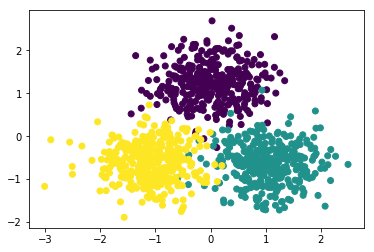

In [14]:
x,y,cl = gen_gmm_data()
plt.scatter(x[:,0], x[:,1], c=cl)

In [15]:
x.shape

(999, 2)

$\quad$ 4. Fit your network using Gradient Descent. Keep track of the total Loss at each iteration and plot the result.

In [16]:
def grad_descent(x, y,  iterations=10, learning_rate=1e-2):
    point = np.random.uniform(-.1,.1,size=26).astype("float128")
    trajectory = [point]
    parameters = (pack_params(point))
    losses = [loss(y, ff_nn_2_ReLu(x.T, parameters).T)]
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        point = point - learning_rate * grad
        trajectory.append(point)
        param = (pack_params(point))
        losses.append(loss(y, ff_nn_2_ReLu(x.T, param).T))
    return (np.array(trajectory), losses)

In [17]:
W1 = np.random.randn(6).reshape((3,2))
b1 = np.random.randn(3).reshape(3,1)
W2 = np.random.randn(6).reshape((2,3))
b2 = np.random.randn(2).reshape(2,1)
V = np.random.randn(6).reshape((3,2))
c = np.random.randn(3).reshape(3,1)

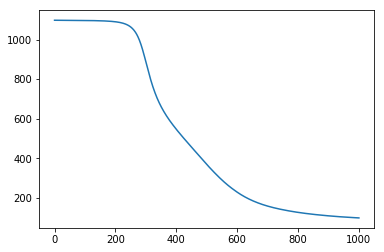

In [18]:
traj, losses = grad_descent(x, y, iterations=1000,learning_rate=1e-4)
plt.plot(losses)

$\quad$5. Repeat the exercise above using Momentum. Comment on whether your algorithm seems to converge more efficiently.

In [19]:
def grad_descent_with_momentum1(x, y, starting_point=None, iterations=10, alpha=.9, epsilon=1e-4):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-.1,.1,size=26).astype("float")
    trajectory = [point]
    losses = [loss(y, ff_nn_2_ReLu(x.T, *pack_params(point)).T)]
    v = np.zeros(point.size)
    
    for i in range(iterations):
        grad = grad_f(point, x, y)
        v = alpha*v + epsilon*grad
        point = point - v
        trajectory.append(point)
        losses.append(loss(y, ff_nn_2_ReLu(x.T, *pack_params(point)).T))
    return (np.array(trajectory), losses)

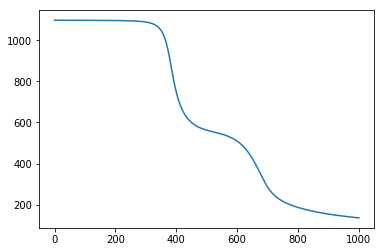

In [20]:
traj, losses = grad_descent(x, y, iterations=1000,learning_rate=1e-4)
plt.plot(losses)

Yes it do converge more efficiently. 